## Visualization for Santa workshop

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
original = pd.read_csv('/Users/kevinko/Desktop/Uchicago/Optimization/Final Project/family_data.csv')
result = pd.read_csv('/Users/kevinko/Desktop/Uchicago/Optimization/Final Project/Result.csv')

In [23]:
original.head()

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,52,38,12,82,33,75,64,76,10,28,4
1,1,26,4,82,5,11,47,38,6,66,61,4
2,2,100,54,25,12,27,82,10,89,80,33,3
3,3,2,95,1,96,32,6,40,31,9,59,2
4,4,53,1,47,93,26,3,46,16,42,39,4


In [24]:
result.head()

,Row,family_id,days
0,1,0.0,52.0
1,2,1.0,26.0
2,3,2.0,100.0
3,4,3.0,2.0
4,5,4.0,53.0


In [25]:
#merge the orignal dataset and result on family_id
merged_df = pd.merge(original, result, on='family_id', how='outer')

In [35]:
choice_0_counts = merged_df[merged_df['choice_0'] == merged_df['days']].groupby('n_people').size()
merged_df.dropna(inplace=True)

In [ ]:
total_counts = merged_df.groupby('n_people').size()

percentage_choice_0 = (choice_0_counts / total_counts) * 100

print("Percentage of each family size that got their top choice (choice_0):")
print(percentage_choice_0)

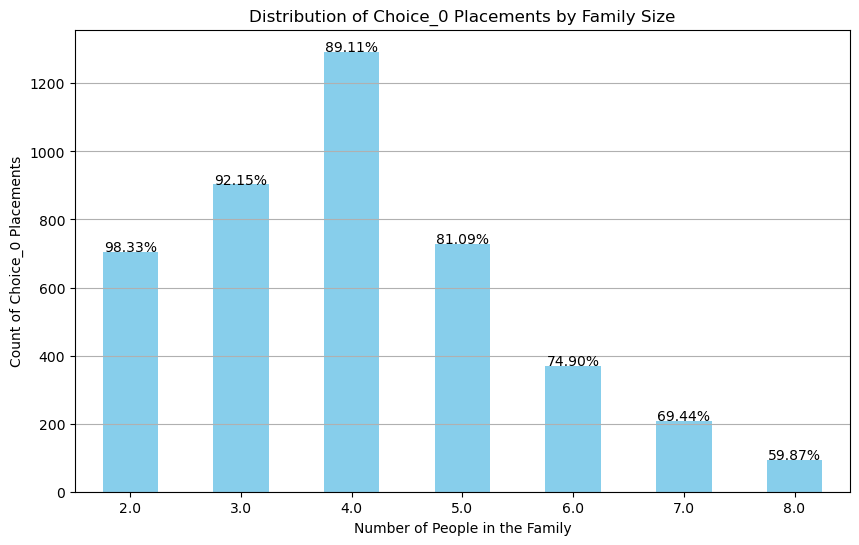

In [42]:
plt.figure(figsize=(10, 6))
choice_0_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number of People in the Family')
plt.ylabel('Count of Choice_0 Placements')
plt.title('Distribution of Choice_0 Placements by Family Size')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i, count in enumerate(choice_0_counts):
    plt.text(i, count + 0.1, f'{percentage_choice_0.iloc[i]:.2f}%', ha='center')
    
plt.show()